<img src="https://raw.githubusercontent.com/brazil-data-cube/code-gallery/master/img/logo-bdc.png" align="right" width="64"/>

# <span style="color:#336699">Web Time Series Service (WTSS) - Examples</span>
<hr style="border:2px solid #0077b9;">

<div style="text-align: left;">
    <a href="https://nbviewer.jupyter.org/github/brazil-data-cube/code-gallery/blob/master/jupyter/R/wtss/wtss-examples.ipynb"><img src="https://raw.githubusercontent.com/jupyter/design/master/logos/Badges/nbviewer_badge.svg" align="center"/></a>
</div>

<br>

<div style="text-align: center;font-size: 90%;">
    Felipe Carvalho de Souza<sup><a href="https://orcid.org/0000-0002-5826-1700"><i class="fab fa-lg fa-orcid" style="color: #a6ce39"></i></a></sup>, Felipe Menino Carlos<sup><a href="https://orcid.org/0000-0002-3334-4315"><i class="fab fa-lg fa-orcid" style="color: #a6ce39"></i></a></sup>, Rennan F. B. Marujo<sup><a href="https://orcid.org/0000-0002-0082-9498"><i class="fab fa-lg fa-orcid" style="color: #a6ce39"></i></a></sup>
    <br/><br/>
    Earth Observation and Geoinformatics Division, National Institute for Space Research (INPE)
    <br/>
    Avenida dos Astronautas, 1758, Jardim da Granja, São José dos Campos, SP 12227-010, Brazil
    <br/><br/>
    Contact: <a href="mailto:brazildatacube@inpe.br">brazildatacube@inpe.br</a>
    <br/><br/>
    Last Update: March 24, 2021
</div>

<br>

<div style="text-align: justify;  margin-left: 25%; margin-right: 25%;">
<b>Abstract.</b> This Jupyter Notebook shows how to use the WTSS service to extract time series from <em>Brazil Data Cube</em>' service and how to perform a basic time series manipulation.
</div>    

<br>
<div style="text-align: justify;  margin-left: 25%; margin-right: 25%;font-size: 75%; border-style: solid; border-color: #0077b9; border-width: 1px; padding: 5px;">
    <b>This Jupyter Notebook is a supplement to the following paper:</b>
    <div style="margin-left: 10px; margin-right: 10px">
    Vinhas, L.; Queiroz, G. R.; Ferreira, K. R.; Camara, G. <a href="http://www.seer.ufu.br/index.php/revistabrasileiracartografia/article/view/44004" target="_blank">Web Services for Big Earth Observation Data</a>. Revista Brasileira de Cartografia, v. 69, n. 5, 18 maio 2017.
    </div>
</div>

# R Client API
<hr style="border:1px solid #0077b9;">

The command below installs the additional packages that are required to run this Jupyter Notebook.

In [1]:
# Remove '#' to install the packages
# install.packages(c("remotes", "magrittr", "dplyr", "tibble", "tidyr"))

For running the examples in this Jupyter Notebook you will need to install the [Rwtss client for R](https://github.com/e-sensing/Rwtss). The command below installs `Rwtss` direct from the code repository of the Brazil Data Cube project using [remotes](https://CRAN.R-project.org/package=remotes).

In [2]:
# Remove '#' to install the package
# remotes::install_github("e-sensing/Rwtss", upgrade = "never")

In [3]:
library(Rwtss)    # Package Rwtss
library(magrittr) # Package to use pipe operator %>%
library(dplyr)    # Package to handle with data frame
library(tibble)   # Package to represent data frame structure
library(tidyr)    # Package to transform data frame structure

Rwtss - R interface to Web Time Series Service.

Loaded Rwtss v0.9.2.
        See ?Rwtss for help, citation("Rwtss") for use in publication.
        See demo(package = "Rwtss") for examples.


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘tidyr’


The following object is masked from ‘package:magrittr’:

    extract




Before we start, let's create a variable that corresponds to the URL of the INPE WTSS service.

In [4]:
wtss_inpe <- "https://brazildatacube.dpi.inpe.br/wtss"

# Retrieving the Time Series
<hr style="border:1px solid #0077b9;">

Let's suppose we have some labeled point. We can create a tibble to represent this sample set with the following code:

In [5]:
points <- tibble::tibble(longitude = c(-46.197, -45.666, -45.893,
                                       -46.536, -46.545, -46.548,
                                       -45.953, -45.627, -45.265),
                         latitude  = c(-12.434, -12.461, -12.662,
                                       -12.306, -12.310, -12.317,
                                       -12.840, -13.157, -12.292),
                         label     = c("Crop", "Crop", "Crop",
                                       "Pasture", "Pasture", "Pasture",
                                       "Cerradao", "Cerradao", "Cerradao"))

points

longitude,latitude,label
<dbl>,<dbl>,<chr>
-46.197,-12.434,Crop
-45.666,-12.461,Crop
-45.893,-12.662,Crop
-46.536,-12.306,Pasture
-46.545,-12.310,Pasture
-46.548,-12.317,Pasture
-45.953,-12.840,Cerradao
-45.627,-13.157,Cerradao
-45.265,-12.292,Cerradao


Thus, let's extract the time series for each sample in the that tibble.

In [6]:
tibble_ts <- list()

#
# get time series from each samples point
#
for(i in seq_len(nrow(points))) {
    time_series <- Rwtss::time_series(wtss_inpe,
                                      attributes = c("NDVI", "EVI"),
                                      latitude   = points[i,]$latitude,
                                      longitude  = points[i,]$longitude,
                                      name       = "MOD13Q1-6",
                                      start_date = "2018-08-01",
                                      end_date   = "2019-09-01")

    tibble_ts[i] <- list(time_series)
}

#
# joining time series into a tibble
#
tibble_ts <- dplyr::bind_rows(tibble_ts)

Finally, let's add the labels to our time series tibble.

In [7]:
#
# add id to each point
#
tibble_ts <- tibble_ts %>% dplyr::mutate(id    = 1:nrow(tibble_ts),
                                         label = factor(points$label))
#
# view the first five lines
#
head(tibble_ts$time_series[[1]], 5)

Index,NDVI,EVI
<date>,<dbl>,<dbl>
2018-08-13,0.2275,0.1416
2018-08-29,0.2082,0.1460
2018-09-14,0.1874,0.1233
2018-09-30,0.1994,0.1380
2018-10-16,0.1862,0.1242


# Time series plots
<hr style="border:1px solid #0077b9;">

Let's create different plots to present our time series, they are variants of the parallel coordinate plot. First, let's start creating a function to transform our tibble in long format. 

> For more about tibble format, please refer to [converting data between wide and long format](http://www.cookbook-r.com/Manipulating_data/Converting_data_between_wide_and_long_format/).

**Auxiliary function**

The function above `wide2long` transforms a wide format tibble to a long format.

In [8]:
#' @description This function transforms a wide tibble to long format
#' @param wtss_ts a tibble retrived from wtss time series function
#' @param ...     columns to add or remove in long form
#' @return a tibble in long format
wide2long <- function(wtss_ts, ...) {

     if (!"wtss" %in% class(wtss_ts))
         stop("Provide a wtss time series pattern.")

    wtss_ts <- wtss_ts %>%
     dplyr::group_by(longitude,
                     latitude,
                     start_date,
                     end_date,
                     label,
                     cube) %>%
     tidyr::unnest(cols = c(time_series)) %>%
     tidyr::gather(indice, valor, -longitude:-Index, -id, ...)

     return(wtss_ts)
 }

In order to create our plots, we will use [ggplot2](https://CRAN.R-project.org/package=ggplot2 ) package and its complementary packages. So, if you do not have these packages, you can install them using the command in below cell. 

In [9]:
# Remove '#' to install the packages
# install.packages(c("ggplot2", "scales", "cowplot"), quiet = TRUE)

In [10]:
library(ggplot2)
library(scales)
library(cowplot)

theme_set(theme_cowplot())

**Parallel Coordinates by bands - greyscale plot**

This graph shows the values of the vegetation indices on the Y axis and the dates of each point in the time series X.

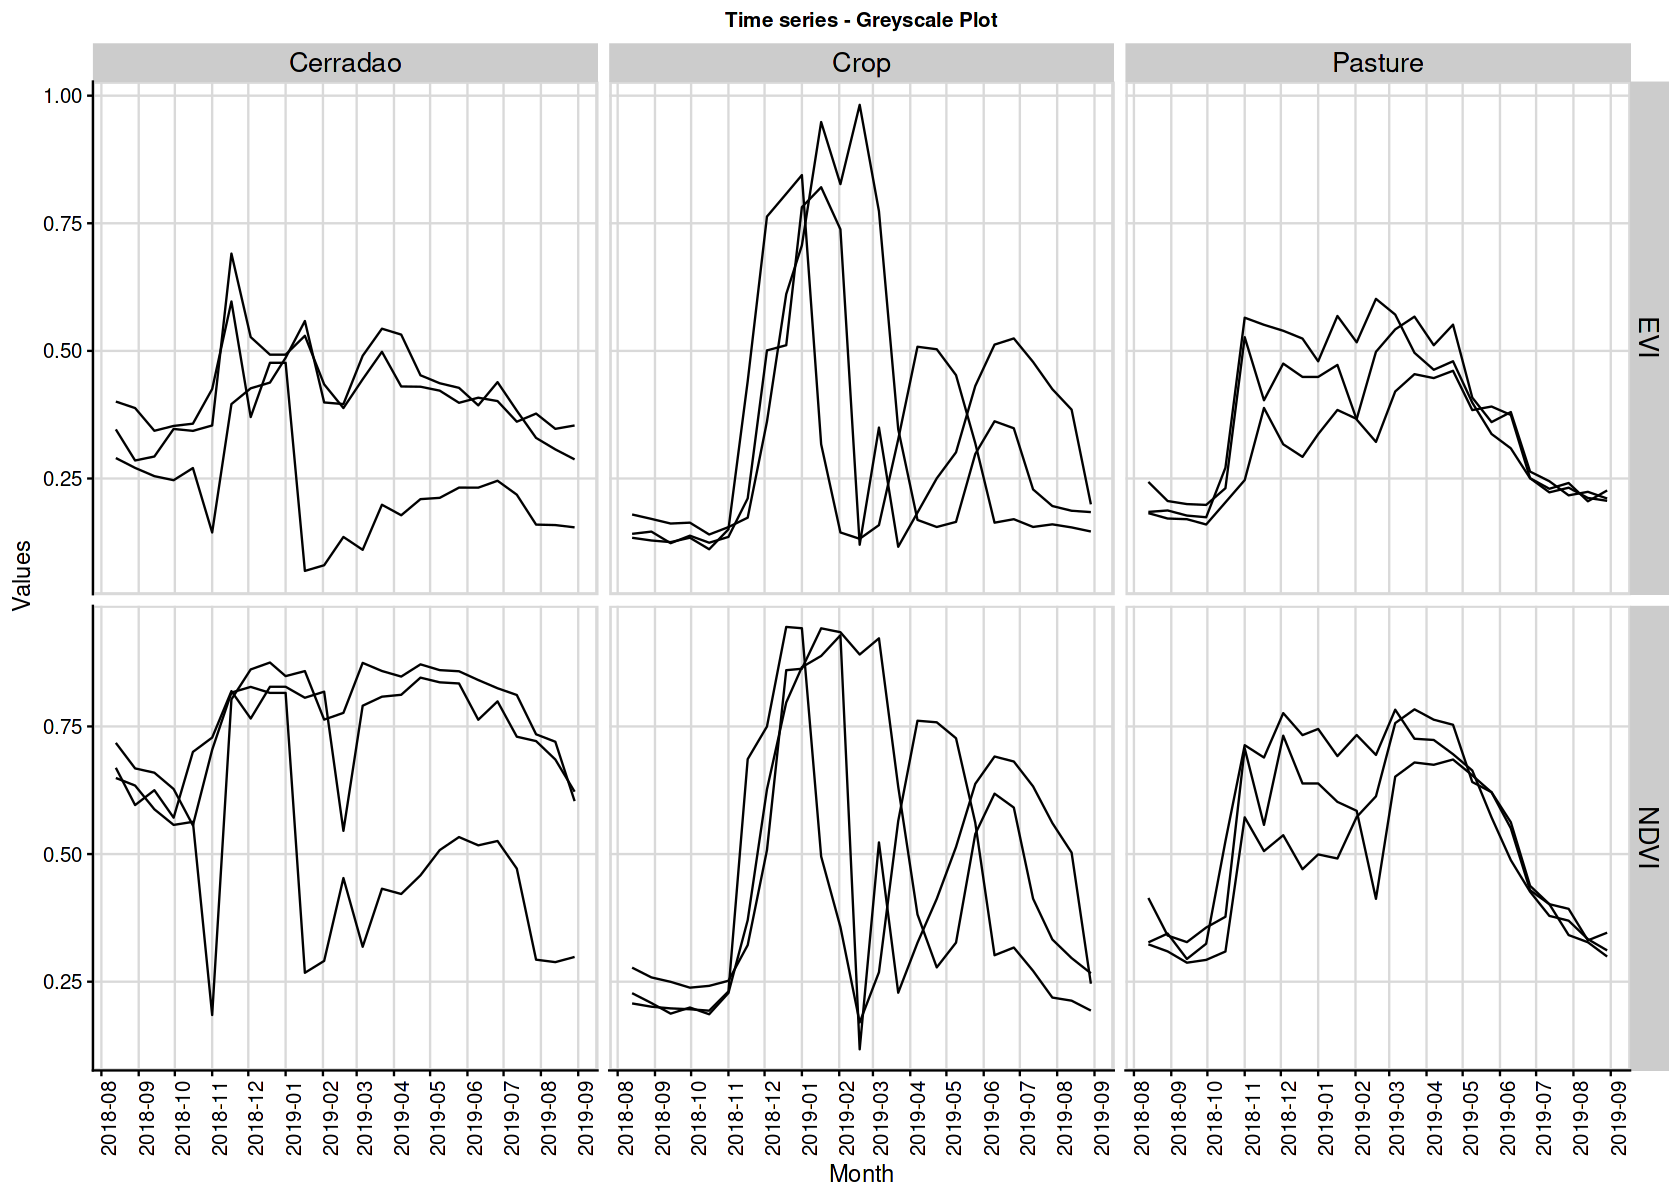

In [11]:
#
# change figure size
#
options(repr.plot.width=14, repr.plot.height=10)

tibble_ts %>%

  #
  # transform time series to long format
  #

  wide2long() %>%

  #
  # create a base plot with ggplot package
  #

  ggplot(aes(x=Index,y= valor, group = id)) +
  geom_line() +
  facet_grid(indice ~ label, scales = "free", space = "free") +
  scale_x_date(name="Month",labels = date_format("%Y-%m"),
               breaks='1 month') +

  #
  # formating axis
  #

  theme(strip.text.x = element_text(size = 16, colour = "black"),
        strip.text.y = element_text(size = 16, colour = "black"),
        plot.title = element_text(size = 12,
                                  hjust= 0.5,
                                  margin = margin(b = 7)),
        axis.text.x = element_text(angle = 90,
                                   hjust=-0.5),
        legend.position="right",
        legend.text = element_text(size = 11)) +

  #
  # add axis legend
  #

  labs(title = "Time series - Greyscale Plot",
       y = "Values") +
  guides(colour = guide_legend(nrow = 3, override.aes = list(size = 2))) +
  panel_border() +
  background_grid()

**Parallel Coordinates by bands - Color plot**

But, to better visualization, lets add different colors to each time series.

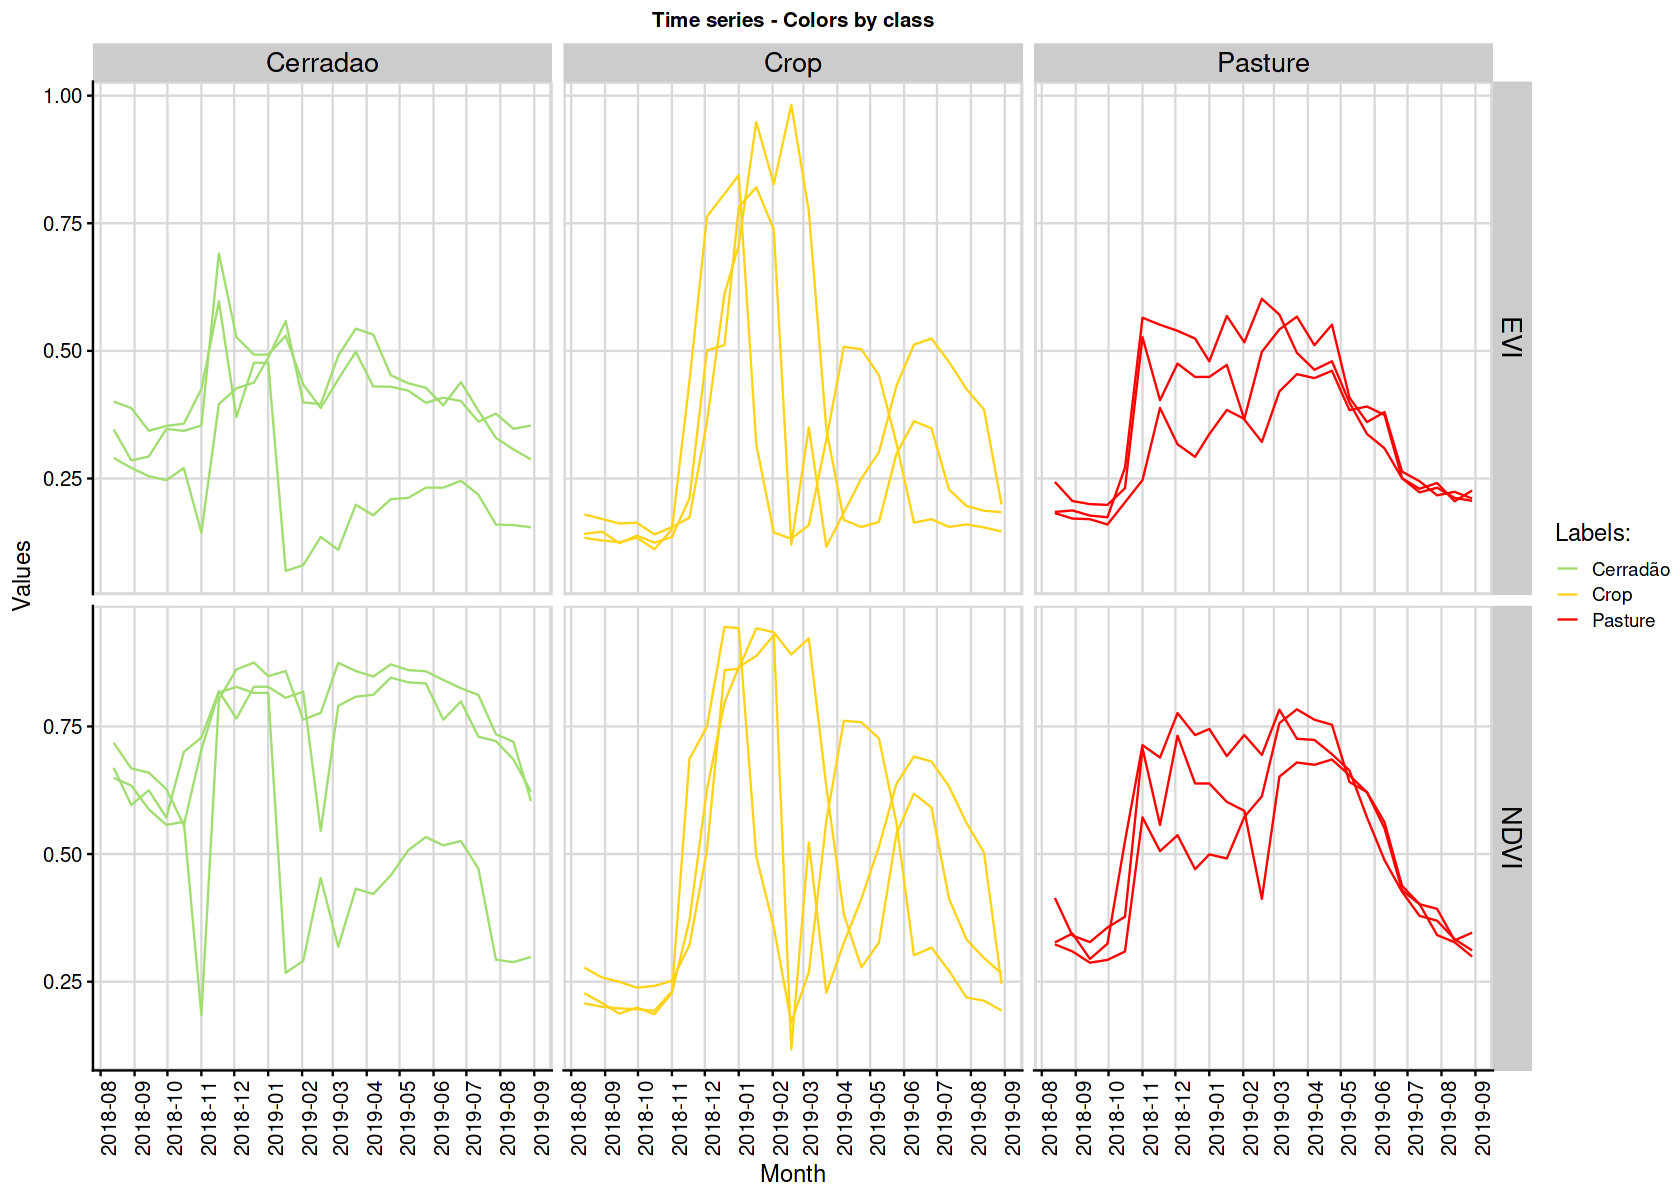

In [12]:
#
# change figure size
#
options(repr.plot.width=14, repr.plot.height=10)

tibble_ts %>%

  #
  # transform time series to long format
  #

  wide2long() %>%

  #
  # create a base plot with ggplot package
  #

  ggplot(aes(x=Index,y= valor, group = id, color = label)) +
  geom_line() +
  facet_grid(indice ~ label, scales = "free", space = "free") +
  scale_x_date(name="Month",labels = date_format("%Y-%m"),
               breaks='1 month') +

  #
  # formating axis
  #

  theme(strip.text.x = element_text(size = 16, colour = "black"),
        strip.text.y = element_text(size = 16, colour = "black"),
        plot.title = element_text(size = 12,
                                  hjust= 0.5,
                                  margin = margin(b = 7)),
        axis.text.x = element_text(angle = 90,
                                   hjust=-0.5),
        legend.position="right",
        legend.text = element_text(size = 11)) +

  #
  # add axis legend
  #

  labs(title = "Time series - Colors by class",
       y = "Values") +
  guides(colour = guide_legend(nrow = 3, override.aes = list(size = 2))) +

  #
  # add colors by labels
  #

  scale_color_manual(name = "Labels: ",
                     labels = c("Cerradão",
                                "Crop",
                                "Pasture"),
                     values = c("#a1dd70" ,
                                "#ffd319",
                                "#ff0000")) +
  panel_border() +
  background_grid()

**Parallel Coordinates by bands - with statistics**

To extract more information of the patterns to each label, we can add some statical measure in it. In below example, its presented a plot based on mean value of each class.

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


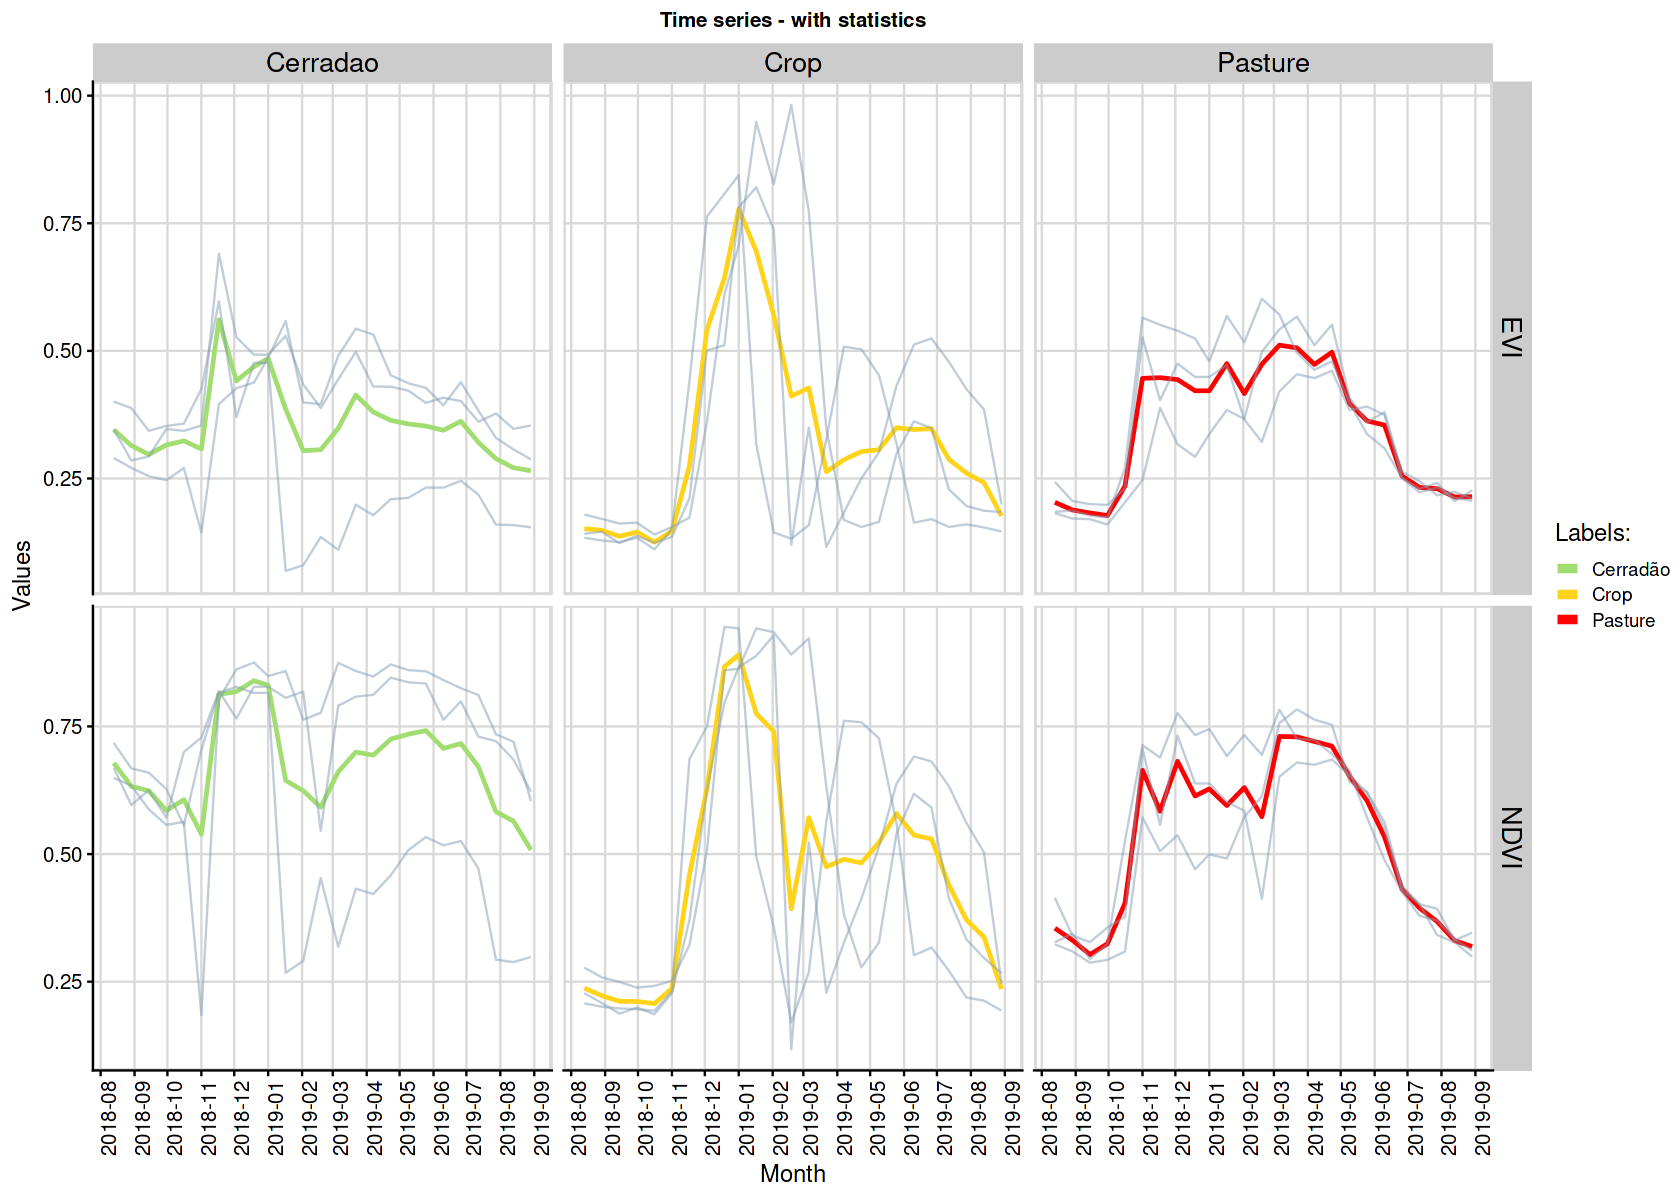

In [13]:
#
# change figure size
#
options(repr.plot.width=14, repr.plot.height=10)

tibble_ts %>%

  #
  # transform time series to long format
  #

  wide2long() %>%

  #
  # create a base plot with ggplot package (with statistics)
  #

  ggplot(aes(x=Index,y= valor, group = id, color = label)) +
  stat_summary(fun = "mean", geom = "smooth", size = 1, aes(colour = label, group = label)) +
  geom_line(colour = "#819BB1", alpha = 0.5) +
  facet_grid(indice ~ label, scales = "free", space = "free") +
  scale_x_date(name="Month",labels = date_format("%Y-%m"),
               breaks='1 month') +

  #
  # formating axis
  #

  theme(strip.text.x = element_text(size = 16, colour = "black"),
        strip.text.y = element_text(size = 16, colour = "black"),
        plot.title = element_text(size = 12,
                                  hjust= 0.5,
                                  margin = margin(b = 7)),
        axis.text.x = element_text(angle = 90,
                                   hjust=-0.5),
        legend.position="right",
        legend.text = element_text(size = 11)) +

  #
  # add axis legend
  #

  labs(title = "Time series - with statistics",
       y = "Values") +
  guides(colour = guide_legend(nrow = 3, override.aes = list(linewidth = 2))) +

  #
  # add colors by labels
  #

  scale_color_manual(name = "Labels: ",
                     labels = c("Cerradão",
                                "Crop",
                                "Pasture"),
                     values = c("#a1dd70" ,
                                "#ffd319",
                                "#ff0000")) +
  panel_border() +
  background_grid()

# Time Series Smoothing
<hr style="border:1px solid #0077b9;">

Now, let's see an example of how to apply a smoothing filter to our extracted time series. Firstly, its necessary to install `signal` to use sav-golay filter.

In [14]:
# Remove '#' to install the packages
# install.packages("signal", quiet = TRUE)

In [15]:
# importing signal package
library(signal)


Attaching package: ‘signal’


The following object is masked from ‘package:dplyr’:

    filter


The following objects are masked from ‘package:stats’:

    filter, poly




Let's add each smooth series within our time series list, as presented in the cell below

In [16]:
# lets add to other variable
tibble_ts_smoothed <- tibble_ts

for(i in seq_len(nrow(tibble_ts_smoothed))) {
    # smoothing the original time series
    tibble_ts_smoothed[i,]$time_series[[1]] <- tibble_ts_smoothed[i,]$time_series[[1]] %>%
                                                 dplyr::mutate(smooth_ndvi = signal::sgolayfilt(NDVI, n = 7),
                                                               smooth_evi  = signal::sgolayfilt(EVI, n = 7))
}

Let's create a plot that presents our smoothed time series and our original time series.

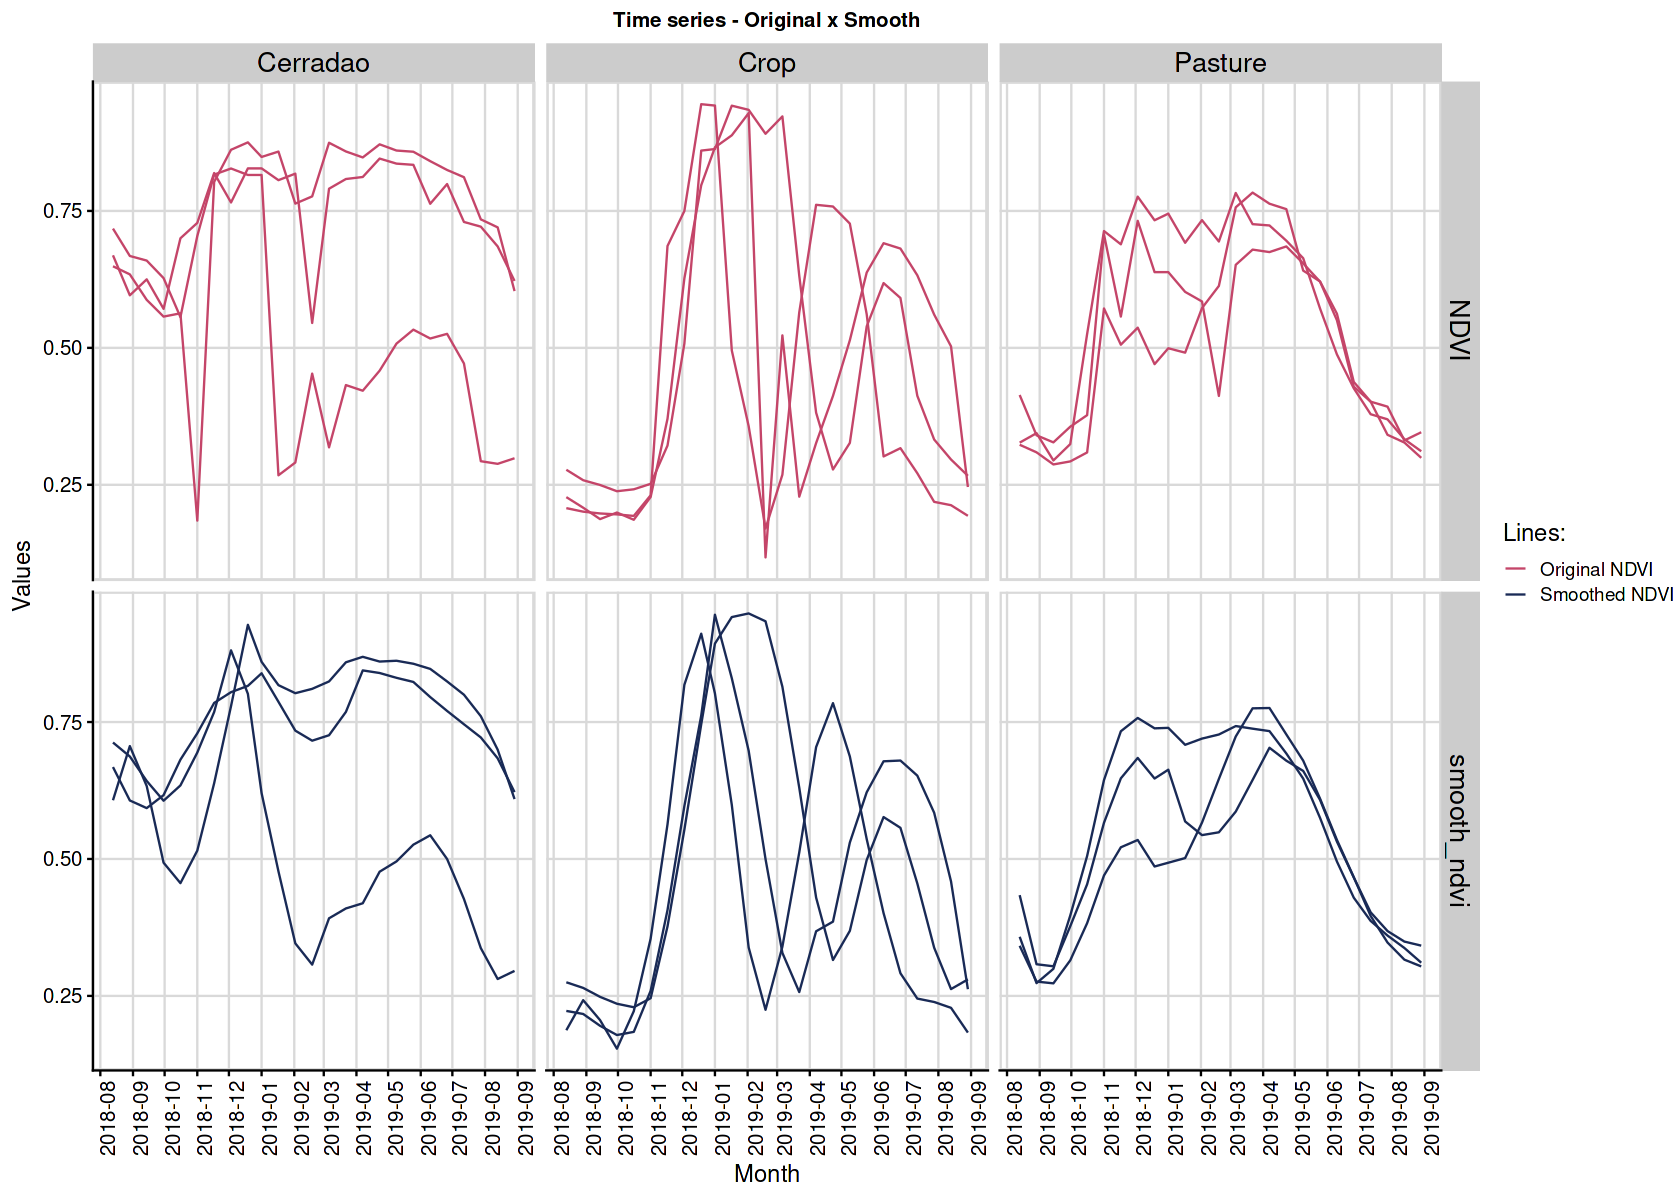

In [17]:
#
# change figure size
#
options(repr.plot.width=14, repr.plot.height=10)


tibble_ts_smoothed %>%

  #
  # transform time series to long format
  #

  wide2long(-EVI, -smooth_evi) %>%

  #
  # create a base plot with ggplot package
  #

  ggplot(aes(x = Index, y = valor, group = id)) +
  geom_line(aes(colour = indice), alpha = 1, ) +
  facet_grid(indice ~ label, scales = "free", space = "free") +
  scale_x_date(name = "Month",labels = date_format("%Y-%m"),
               breaks = '1 month')  +

  #
  # formating axis
  #

  theme(strip.text.x = element_text(size = 16, colour = "black"),
        strip.text.y = element_text(size = 16, colour = "black"),
        plot.title = element_text(size = 12,
                                  hjust = 0.5,
                                  margin = margin(b = 7)),
        axis.text.x = element_text(angle = 90,
                                   hjust = -0.5),
        legend.position="right",
        legend.text = element_text(size = 11)) +

  #
  # add axis legend
  #

  labs(title = "Time series - Original x Smooth",
       y = "Values") +
  guides(colour = guide_legend(nrow = 3, override.aes = list(size = 2))) +

  #
  # add colors by labels
  #

  scale_color_manual(name = "Lines: ",
                     labels = c("Original NDVI",
                                "Smoothed NDVI"),
                     values = c("#c44569" ,
                                "#192a56")) +
  panel_border() +
  background_grid()

# References
<hr style="border:1px solid #0077b9;">

- [WTSS Server](https://github.com/brazil-data-cube/wtss)

- [WTSS OpenAPI 3 Specification](https://github.com/brazil-data-cube/wtss-spec)

- [R Client Library for Web Time Series Service - Github Repository](https://github.com/e-sensing/wtss)

